In [8]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

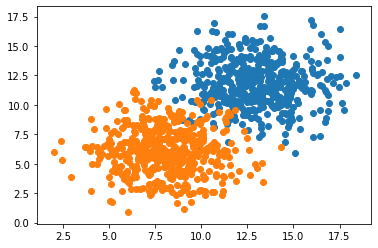

In [3]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [14]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs = 15, shuffle='true')

Epoch 1/15
1000/1000 [==============================] - 0s 81us/step - loss: 0.7059 - accuracy: 0.6330
Epoch 2/15
1000/1000 [==============================] - 0s 16us/step - loss: 0.5339 - accuracy: 0.7270
Epoch 3/15
1000/1000 [==============================] - 0s 14us/step - loss: 0.4018 - accuracy: 0.8580
Epoch 4/15
1000/1000 [==============================] - 0s 14us/step - loss: 0.3372 - accuracy: 0.9030
Epoch 5/15
1000/1000 [==============================] - 0s 14us/step - loss: 0.2924 - accuracy: 0.9260
Epoch 6/15
1000/1000 [==============================] - 0s 13us/step - loss: 0.2634 - accuracy: 0.9380
Epoch 7/15
1000/1000 [==============================] - 0s 13us/step - loss: 0.2373 - accuracy: 0.9480
Epoch 8/15
1000/1000 [==============================] - 0s 13us/step - loss: 0.2022 - accuracy: 0.9600
Epoch 9/15
1000/1000 [==============================] - 0s 14us/step - loss: 0.1875 - accuracy: 0.9610
Epoch 10/15
1000/1000 [==============================] - 0s 13us/step - l

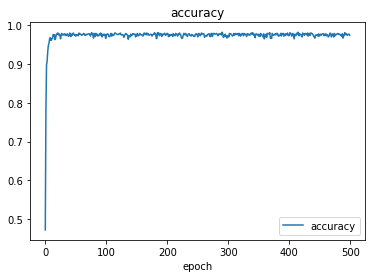

In [13]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

In [ ]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['accuracy'])